<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/FrozenLakeSoln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

# Suppress all DeprecationWarnings globally
#You can safely ignore warnings. This code helps supress some
warnings.simplefilter("ignore", DeprecationWarning)


In [21]:
#Enviroment setup
import gym
import numpy as np

# Define the custom 8x8 grid
custom_map = [
    "SFFFFFFF",  # Row 1
    "FFFFFFFF",  # Row 2
    "FFHFFFFF",  # Row 3
    "FFHFFFFF",  # Row 4
    "HHHFFHHH",  # Row 5 (specified)
    "FFFFFFFF",  # Row 6
    "FFHFFFFF",  # Row 7
    "FFHFFFFG"   # Row 8
]

env=gym.make('FrozenLake-v1', desc=custom_map, is_slippery=True, new_step_api=True)

In [22]:



n_states = env.observation_space.n
n_actions = env.action_space.n

gamma = 0.9
theta = 1e-6


V = np.zeros(n_states)
policy = np.zeros(n_states, dtype=int)


def value_iteration():
    global V, policy
    while True:
        delta = 0
        new_V = np.copy(V)
        for s in range(n_states):
            q_values = np.zeros(n_actions)
            for a in range(n_actions):
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    if done:
                        q_values[a] += prob * reward
                    else:
                        q_values[a] += prob * (reward + gamma * V[next_state])
            new_V[s] = max(q_values)
            delta = max(delta, abs(V[s] - new_V[s]))
            policy[s] = np.argmax(q_values)
        V = new_V
        if delta < theta:
            break


def extract_policy():
    for s in range(n_states):
        q_values = np.zeros(n_actions)
        for a in range(n_actions):
            for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                if done:
                    q_values[a] += prob * reward
                else:
                    q_values[a] += prob * (reward + gamma * V[next_state])
        policy[s] = np.argmax(q_values)


def display_policy():
    actions = ['←', '↓', '→', '↑']
    grid_size = int(np.sqrt(n_states))


    lake_map = env.unwrapped.desc

    print("\nOptimal Policy:\n")
    for i in range(grid_size):
        row = ""
        for j in range(grid_size):
            state = i * grid_size + j
            tile = lake_map[i, j].decode("utf-8")

            if tile == 'H':
                cell = 'H'  # Hole
            elif tile == 'G':
                cell = 'G'  # Goal
            elif tile == 'S':
                cell = 'S'  # Start position
            else:
                cell = actions[policy[state]]
            row += f"| {cell} "
        row += "|"
        print(row)
        print("-" * (grid_size * 4 + 1))


value_iteration()
extract_policy()
display_policy()





Optimal Policy:

| S | → | → | → | ← | ← | ← | ↓ |
---------------------------------
| ↑ | ↑ | ↑ | → | ↓ | ← | ← | ↓ |
---------------------------------
| ↑ | ← | H | → | ↓ | ← | ← | ↓ |
---------------------------------
| ↑ | ← | H | → | ← | ↑ | ↑ | ↑ |
---------------------------------
| H | H | H | → | ← | H | H | H |
---------------------------------
| ↓ | ↓ | ↓ | → | ↓ | ↓ | ↓ | ↓ |
---------------------------------
| ↑ | ← | H | → | → | → | ↓ | ↓ |
---------------------------------
| → | ← | H | → | → | → | → | G |
---------------------------------


In [23]:
# Function to run multiple episodes and compute average reward and steps
def run_experiment(policy, env, num_episodes=1000):
    terminal_states = []
    rewards = []
    steps = []
    for _ in range(num_episodes):
        # Reset the environment (new API returns observation and info)
        # The updated reset() method returns observation only
        obs = env.reset()
        total_reward = 0
        step_count = 0
        done = False
        while not done:
            # Choose the action from the computed policy
            action = policy[obs]
            # Perform the action; new API returns (obs, reward, terminated, truncated, info)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            step_count += 1
            terminal_states.append(obs)
        rewards.append(total_reward)
        steps.append(step_count)

    avg_reward = np.mean(rewards)
    avg_steps = np.mean(steps)
    print(f"\nAfter {num_episodes} episodes:")
    print(f"Average reward: {avg_reward}")
    print(f"Average number of steps per episode: {avg_steps}")
    # Return terminal states along with average reward and steps
    return avg_reward, avg_steps, terminal_states # Modified line to return terminal_states

# Run the experiment
avg_reward, avg_steps, terminal_states = run_experiment(policy, env, num_episodes=20000)

# Reset the environment
env.reset()

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



After 20000 episodes:
Average reward: 0.7491
Average number of steps per episode: 70.22145


0

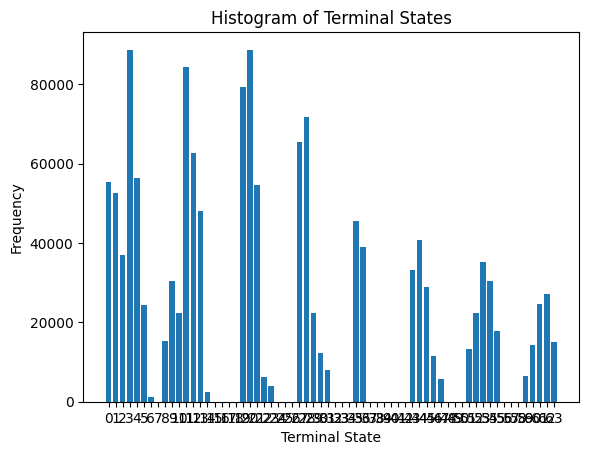

In [24]:
# prompt: make a historgram showing outcomes of episodes

import matplotlib.pyplot as plt

# Assuming 'terminal_states' is the list of terminal states from the previous code
plt.hist(terminal_states, bins=range(n_states + 1), align='left', rwidth=0.8)
plt.xlabel("Terminal State")
plt.ylabel("Frequency")
plt.title("Histogram of Terminal States")
plt.xticks(range(n_states)) # Set x-axis ticks to integers representing states
plt.show()
